# Conformal two-structure as the gravitational degrees of freedom in general relativity by D'Inverno & Stachel
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://aip.scitation.org/doi/10.1063/1.523650

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols( 't rho phi z dt drho dphi dz' ) 

In [4]:
psi = Function('psi')(rho,t)
psi

In [5]:
gamma = Function('gamma')(rho,t)
gamma

In [6]:
omega = Function('omega')(rho,t)
omega

In [7]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand( exp(2*(gamma-psi)) * (dt**2 - drho**2) - exp(2*psi) * (dz + omega * dphi)**2 - rho**2 * exp(-2*psi) * dphi**2 )
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)    
⎢          0                        0             - ρ ⋅ℯ           - ω (ρ, t)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(ρ, t)              
⎣          0                        0                      -ω(ρ, t)⋅ℯ 

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ 2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(ρ, t)  -2⋅ψ(ρ, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(ρ, t)    2        2⋅ψ(ρ, t)    
⎢          0                        0             - ρ ⋅ℯ           - ω (ρ, t)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(ρ, t)              
⎣          0                        0                      -ω(ρ, t)⋅ℯ 

In [13]:
from einsteinpy.symbolic import *

In [25]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [26]:
metric = MetricTensor(m,syms)

In [27]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                      
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, t)) - ──(ψ(ρ, t))  ──(γ(ρ, t)) - ──(ψ(ρ, t))                                      
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                         

In [28]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(ρ, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(ρ, t) ∂        
⎢                                                         ──(γ(ρ, t)) 

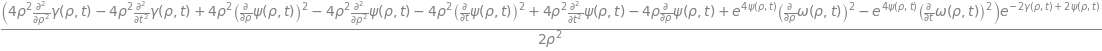

In [29]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [30]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(ρ, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂ρ          
⎢───(γ(ρ, t)) - ───(γ(ρ, t)) - ───(ψ(ρ, t)) - 2⋅⎜──(ψ(ρ, t))⎟  + ───(ψ(ρ, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 ρ      
⎢∂ρ             ∂t             ∂ρ                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

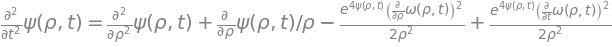

In [40]:
equation2 = Eq(diff(psi,t,t) , expand( solve( Ric.tensor()[3,3] , diff(psi,t,t) )[0] ) )
equation2

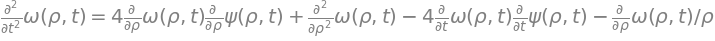

In [53]:
equation3 = Eq(diff(omega,t,t),simplify(expand(solve( Ric.tensor()[2,3] , diff(omega,t,t) )[0]).subs(equation2.args[0],equation2.args[1])))
equation3

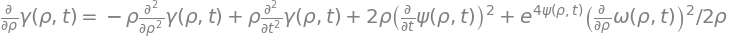

In [61]:
equation4 = Eq(diff(gamma,rho) ,simplify(solve( Ric.tensor()[0,0], diff(gamma,rho) )[0].subs(equation2.args[0],equation2.args[1])))
equation4

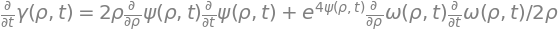

In [35]:
equation5 = Eq( diff(gamma,t) , solve( Ric.tensor()[1,0] , diff(gamma,t) )[0] ) 
equation5

In [63]:
vacuumFieldEquations = Matrix([equation2,equation3,equation4,equation5])
vacuumFieldEquations

⎡                                                                    2                      
⎢                              ∂              4⋅ψ(ρ, t) ⎛∂          ⎞     4⋅ψ(ρ, t) ⎛∂      
⎢  2              2            ──(ψ(ρ, t))   ℯ         ⋅⎜──(ω(ρ, t))⎟    ℯ         ⋅⎜──(ω(ρ,
⎢ ∂              ∂             ∂ρ                       ⎝∂ρ         ⎠               ⎝∂t     
⎢───(ψ(ρ, t)) = ───(ψ(ρ, t)) + ─────────── - ───────────────────────── + ───────────────────
⎢  2              2                 ρ                      2                           2    
⎢∂t             ∂ρ                                      2⋅ρ                         2⋅ρ     
⎢                                                                                           
⎢                                                                                      ∂    
⎢  2                                          2                                        ──(ω(
⎢ ∂               ∂           ∂              ∂               ∂        